In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Resultsd.csv')

In [3]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])


In [4]:
df.set_index('datetime', inplace=True)


In [5]:
monthly_pizza_counts = df.groupby([pd.Grouper(freq='M'), 'category'])['order_details_id'].count().reset_index()


In [6]:
monthly_pizza_counts.columns = ['month', 'category', 'count']


In [7]:
top_categories = monthly_pizza_counts.groupby('category')['count'].sum().nlargest(10).index


In [8]:
monthly_pizza_counts = monthly_pizza_counts[monthly_pizza_counts['category'].isin(top_categories)]


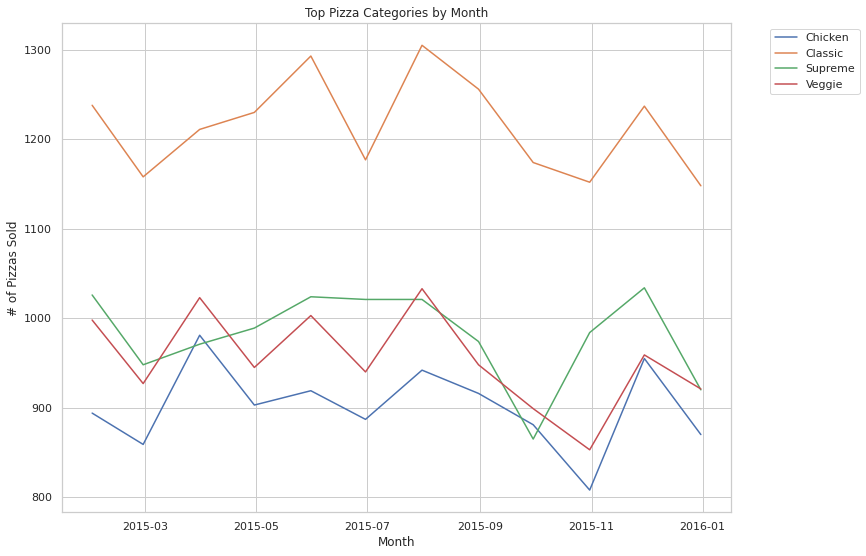

In [11]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("whitegrid")
sns.lineplot(x='month', y='count', hue='category', data=monthly_pizza_counts)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top Pizza Categories by Month')
plt.xlabel('Month')
plt.ylabel('# of Pizzas Sold')

plt.savefig('CHART1.png', dpi=300, bbox_inches='tight')